In [18]:
#importando bibliotecas e identificando suas versões
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn

print(f"Versão do Pandas: {pd.__version__}")
print(f"Versão do NumPy: {np.__version__}")
print(f"Versão do Matplotlib: {matplotlib.__version__}")
print(f"Versão do Seaborn: {sns.__version__}")
print(f"Versão do Scikit-learn: {sklearn.__version__}")

Versão do Pandas: 2.2.2
Versão do NumPy: 1.26.4
Versão do Matplotlib: 3.9.2
Versão do Seaborn: 0.13.2
Versão do Scikit-learn: 1.5.1


In [28]:
df_filmes = pd.read_csv('desafio_indicium_imdb.csv')
df_filmes.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [30]:
df_filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [32]:
df_filmes.describe()

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,999.000000,842.000000,9.990000e+02
mean,500.000000,7.947948,77.969121,2.716214e+05
std,288.530761,0.272290,12.383257,3.209126e+05
min,1.000000,7.600000,28.000000,2.508800e+04
25%,250.500000,7.700000,70.000000,5.547150e+04
50%,500.000000,7.900000,79.000000,1.383560e+05
75%,749.500000,8.100000,87.000000,3.731675e+05
max,999.000000,9.200000,100.000000,2.303232e+06


In [46]:
#convertendo as colunas 
df_filmes['Runtime'] = (
    df_filmes['Runtime'].astype(str).str.replace(' min', '', regex=False).astype(float)
)
df_filmes['Gross'] = (
    df_filmes['Gross'].astype(str).str.replace(',', '', regex=False)
)
df_filmes['Gross'] = pd.to_numeric(df_filmes['Gross'], errors='coerce')

df_filmes['Released_Year'] = pd.to_numeric(df_filmes['Released_Year'], errors='coerce')

df_filmes['Meta_score'] = pd.to_numeric(df_filmes['Meta_score'], errors='coerce')

# Preenchendo valores ausentes com a média das colunas numéricas
for col in ['Gross', 'Meta_score', 'Runtime']:
    df_filmes[col] = df_filmes[col].fillna(df_filmes[col].mean())

df_filmes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  998 non-null    float64
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    float64
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     999 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          999 non-null    float64
dtypes: float64(5), int64(2), object(9)
memory usage: 125.0+ KB


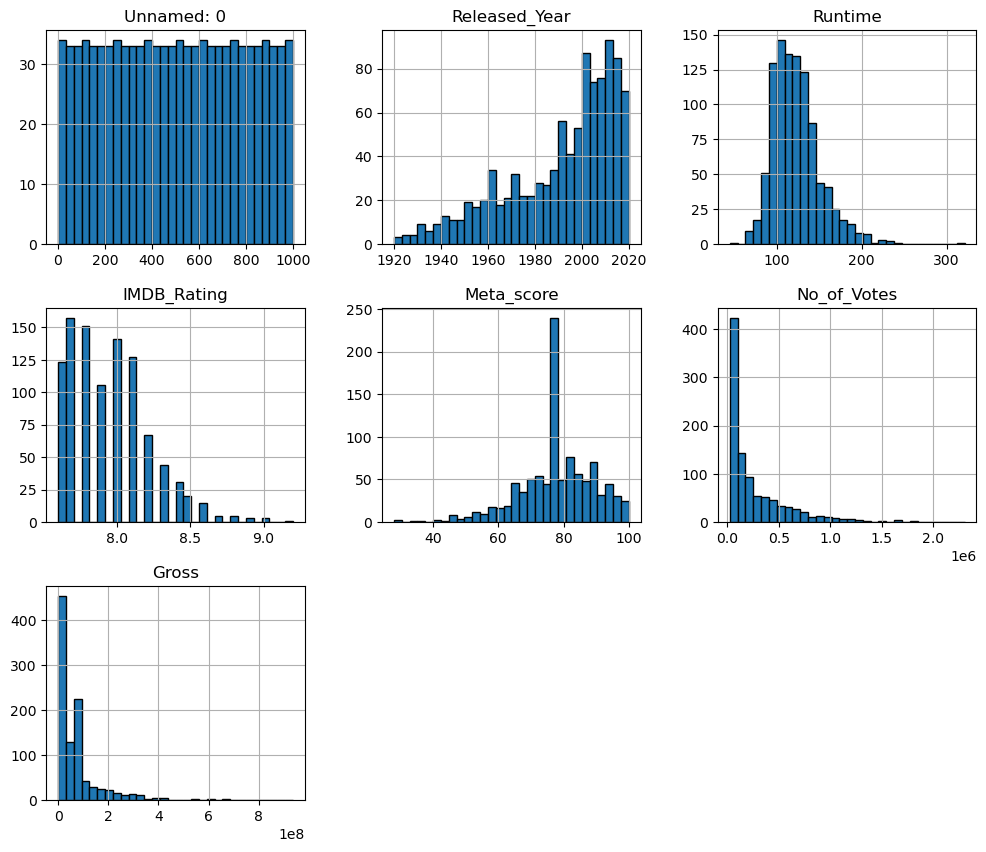

In [84]:
df_filmes.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.show()

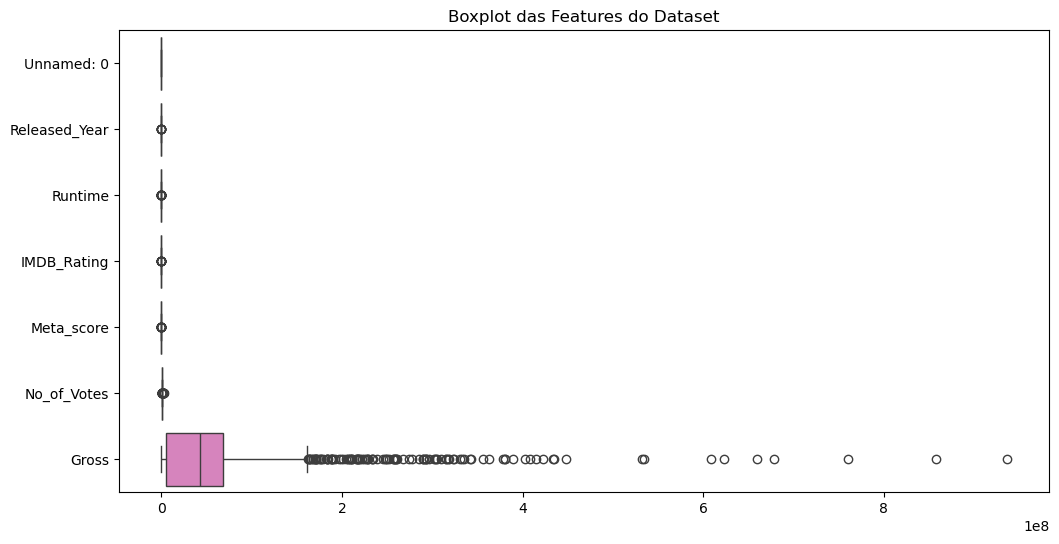

In [88]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filmes, orient="h")
plt.title("Boxplot das Features do Dataset")
plt.show()


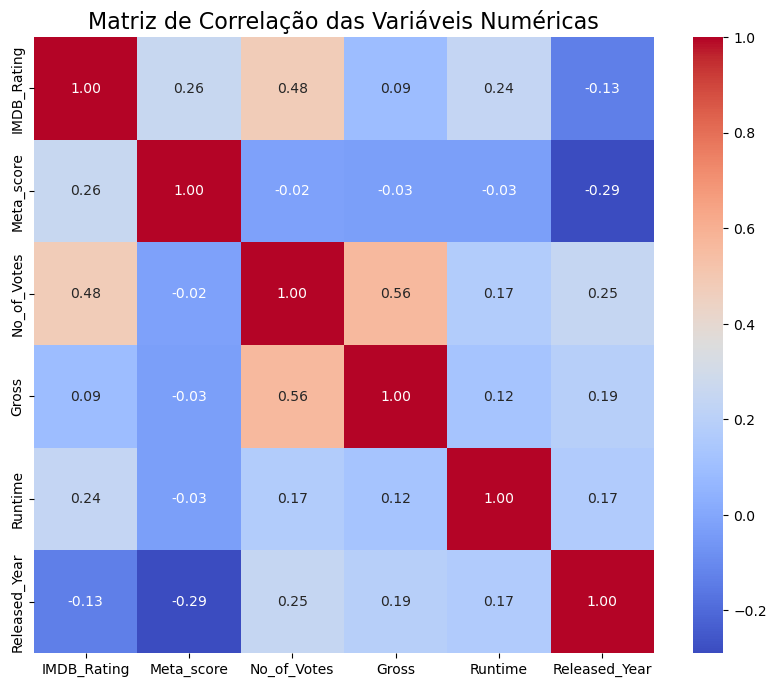

In [52]:
#verificando a matriz de Correlação das Variáveis
numeric_cols = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime', 'Released_Year']
matriz_correlacao = df_filmes[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns)
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16)
plt.show()

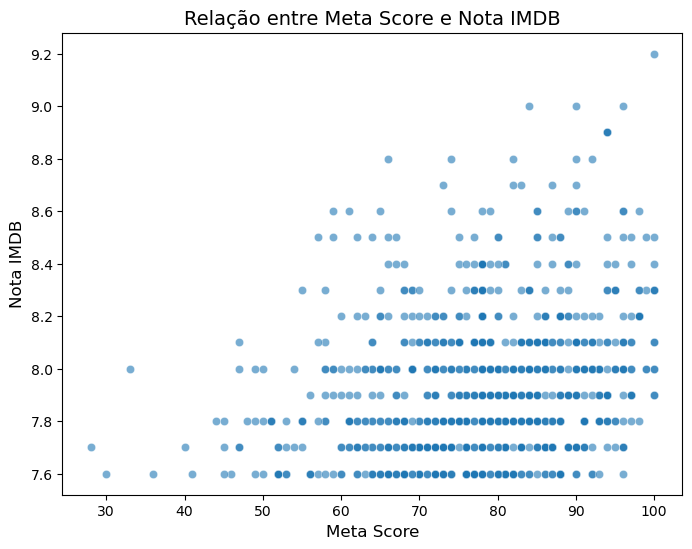

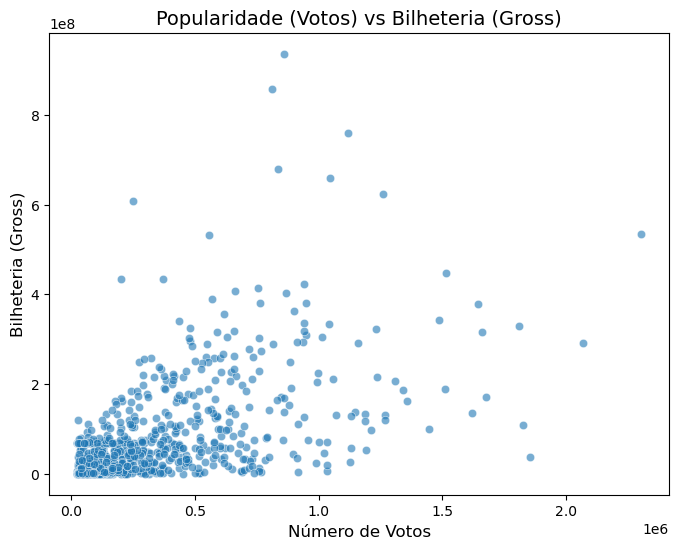

In [78]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Meta_score", y="IMDB_Rating", data=df_filmes, alpha=0.6)
plt.title("Relação entre Meta Score e Nota IMDB", fontsize=14)
plt.xlabel("Meta Score", fontsize=12)
plt.ylabel("Nota IMDB", fontsize=12)
plt.show()

# Dispersão Gross vs No_of_Votes
plt.figure(figsize=(8,6))
sns.scatterplot(x="No_of_Votes", y="Gross", data=df_filmes, alpha=0.6)
plt.title("Popularidade (Votos) vs Bilheteria (Gross)", fontsize=14)
plt.xlabel("Número de Votos", fontsize=12)
plt.ylabel("Bilheteria (Gross)", fontsize=12)
plt.show()


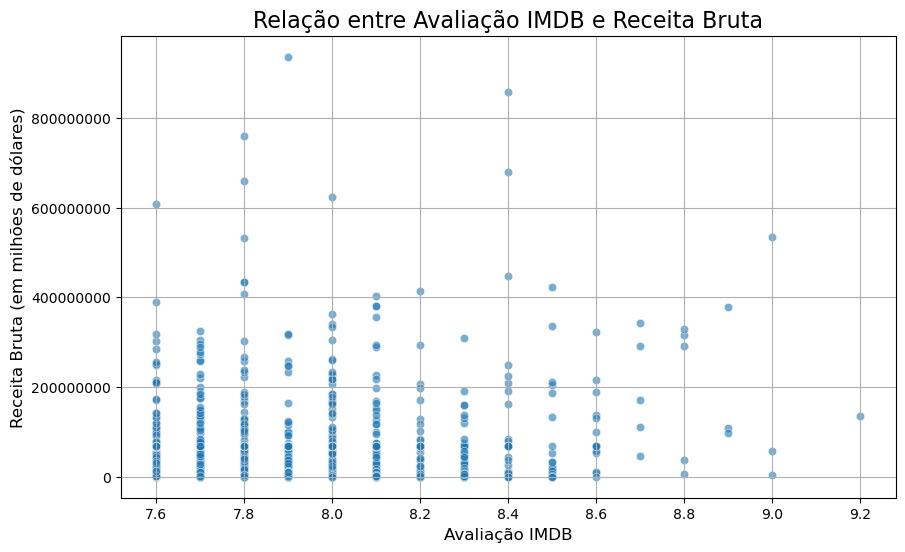

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Gross', data=df_movies_cleaned, alpha=0.6)
plt.title('Relação entre Avaliação IMDB e Receita Bruta', fontsize=16)
plt.xlabel('Avaliação IMDB', fontsize=12)
plt.ylabel('Receita Bruta (em milhões de dólares)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()



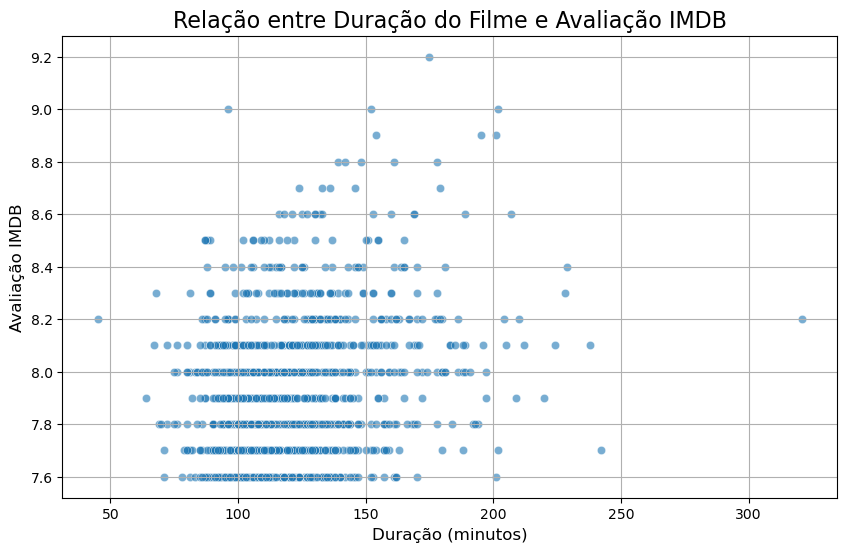

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Runtime', y='IMDB_Rating', data=df_filmes, alpha=0.6)
plt.title('Relação entre Duração do Filme e Avaliação IMDB', fontsize=16)
plt.xlabel('Duração (minutos)', fontsize=12)
plt.ylabel('Avaliação IMDB', fontsize=12)
plt.grid(True)
plt.show()



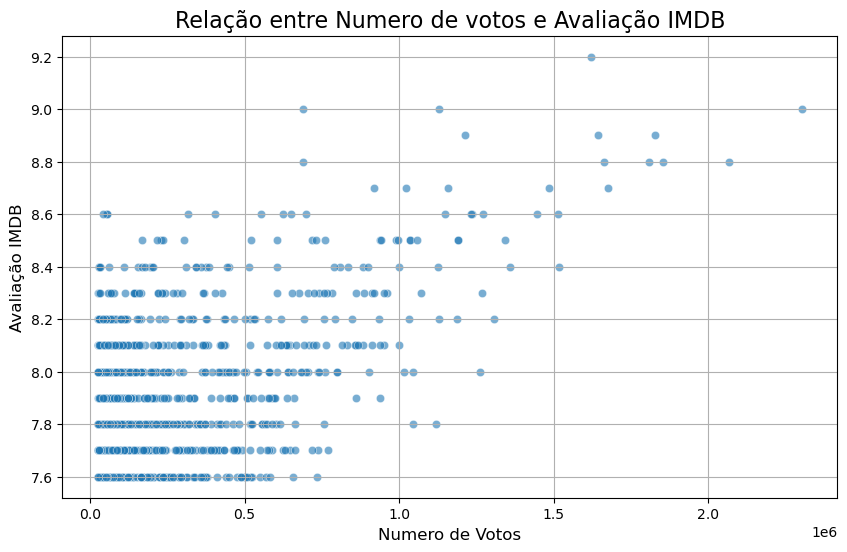

In [96]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='No_of_Votes', y='IMDB_Rating', data=df_filmes, alpha=0.6)
plt.title('Relação entre Numero de votos e Avaliação IMDB', fontsize=16)
plt.xlabel('Numero de Votos', fontsize=12)
plt.ylabel('Avaliação IMDB', fontsize=12)
plt.grid(True)
plt.show()


C:\Users\Junior\AppData\Local\Temp\ipykernel_16980\2822853006.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=qt_generos.values, y=qt_generos.index, palette='viridis')


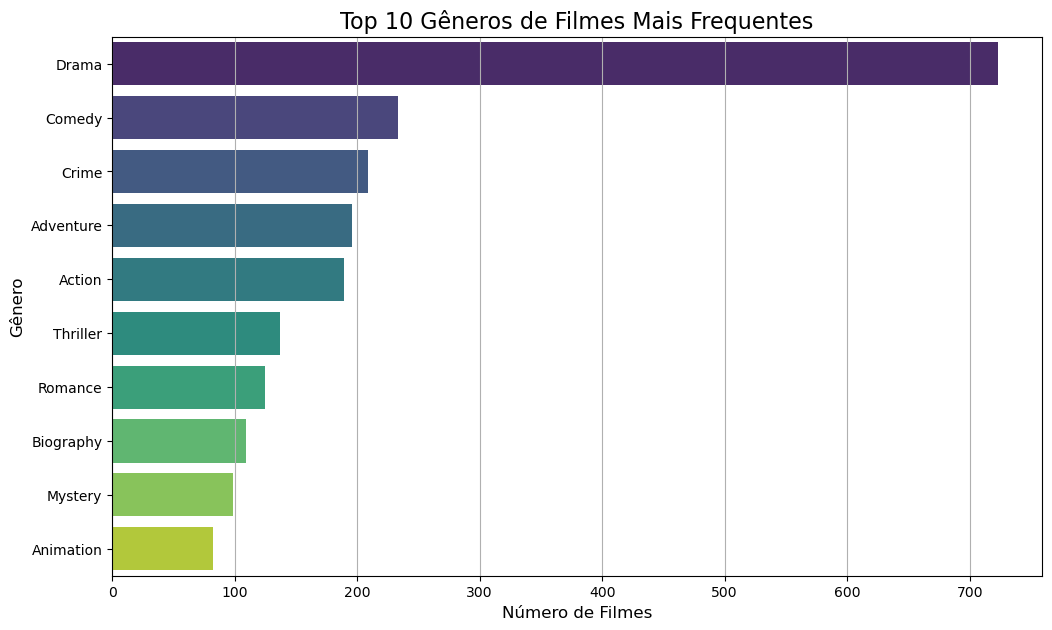

In [58]:
generos = df_filmes['Genre'].str.split(', ').explode()
qt_generos = generos.value_counts().head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=qt_generos.values, y=qt_generos.index, palette='viridis')
plt.title('Top 10 Gêneros de Filmes Mais Frequentes', fontsize=16)
plt.xlabel('Número de Filmes', fontsize=12)
plt.ylabel('Gênero', fontsize=12)
plt.grid(axis='x')
plt.show()



C:\Users\Junior\AppData\Local\Temp\ipykernel_16980\797782539.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nota_diretores.values, y=nota_diretores.index, palette='cividis')


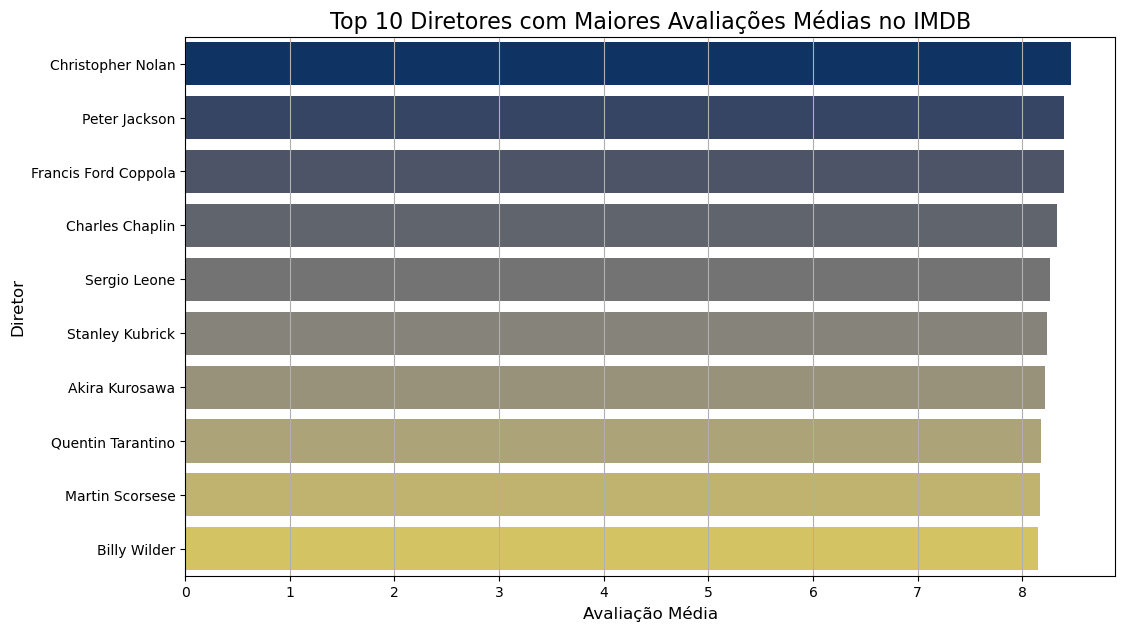

In [62]:
# EDA 4: Top 10 Diretores com Maiores Avaliações Médias no IMDB
diretor_total = df_filmes['Director'].value_counts()
top_diretores = diretor_total[diretor_total >= 5].index
df_top_diretores = df_filmes[df_filmes['Director'].isin(top_diretores)]
nota_diretores = df_top_diretores.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=nota_diretores.values, y=nota_diretores.index, palette='cividis')
plt.title('Top 10 Diretores com Maiores Avaliações Médias no IMDB', fontsize=16)
plt.xlabel('Avaliação Média', fontsize=12)
plt.ylabel('Diretor', fontsize=12)
plt.grid(axis='x')
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

print("\n--- FASE 3: PREVISÃO DA NOTA DO IMDB ---")

# Selecionando as variáveis para o modelo de regressão
features = ['No_of_Votes', 'Meta_score', 'Gross', 'Runtime', 'Released_Year']
target = 'IMDB_Rating'

# Removendo quaisquer linhas com valores NaN para garantir que o modelo possa ser treinado
data = df_filmes[features + [target]].dropna()
X = data[features]
y = data[target]

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializando e treinando o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Avaliando o modelo no conjunto de teste
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erro Médio Absoluto (MAE): {mae:.2f}')
print(f'O modelo erra, em média, {mae:.2f} pontos da nota real do IMDB.')
print(f'Coeficiente de Determinação (R²): {r2:.2f}')




--- FASE 3: PREVISÃO DA NOTA DO IMDB ---
Erro Médio Absoluto (MAE): 0.17
O modelo erra, em média, 0.17 pontos da nota real do IMDB.
Coeficiente de Determinação (R²): 0.31


In [68]:
# Usando o modelo treinado para prever a nota do filme "The Shawshank Redemption"
filme_predicao = pd.DataFrame([{
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}])

# Aplicando as mesmas transformações de limpeza do dataset de treino
filme_predicao['Runtime'] = filme_predicao['Runtime'].str.replace(' min', '', regex=False).astype(float)
filme_predicao['Gross'] = filme_predicao['Gross'].str.replace(',', '', regex=False).astype(float)
filme_predicao['Released_Year'] = pd.to_numeric(filme_predicao['Released_Year'], errors='coerce')
filme_predicao['Meta_score'] = pd.to_numeric(filme_predicao['Meta_score'], errors='coerce')

# Selecionando apenas as features que o modelo espera
filme_predicao_features = filme_predicao[features]

# Fazendo a previsão
nota_prevista = model.predict(filme_predicao_features)
print(f'\nNota prevista pelo modelo para "The Shawshank Redemption": {nota_prevista[0]:.2f}')


Nota prevista pelo modelo para "The Shawshank Redemption": 9.15


In [98]:
import joblib

# Supondo que você já tenha o modelo de LinearRegression treinado na variável 'model'
# Conforme o código no notebook, o modelo é treinado na variável 'model'.

# Salvar o modelo em um arquivo .pkl
# O arquivo será salvo no mesmo diretório do seu notebook.
joblib.dump(model, 'modelo_regressao_imdb.pkl')

print("Modelo salvo com sucesso em 'modelo_regressao_imdb.pkl'")

# --- Exemplo de como carregar o modelo de volta para uso ---
# Carregar o modelo a partir do arquivo
modelo_carregado = joblib.load('modelo_regressao_imdb.pkl')

print("Modelo carregado com sucesso!")

# Agora você pode usar o modelo carregado para fazer novas previsões
# Por exemplo, vamos prever a nota de um filme com base nos dados do "The Shawshank Redemption"
# As features de entrada precisam estar no formato correto (um array 2D)
# O código a seguir assume que 'filme_predicao_features' já foi criado.

# Fazer a previsão com o modelo carregado
nota_prevista_com_modelo_carregado = modelo_carregado.predict(filme_predicao_features)

print(f"Nota prevista pelo modelo carregado: {nota_prevista_com_modelo_carregado[0]:.2f}")

Modelo salvo com sucesso em 'modelo_regressao_imdb.pkl'
Modelo carregado com sucesso!
Nota prevista pelo modelo carregado: 9.15
